In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
     

In [2]:
data = pd.read_csv("New Dataset 5000.csv")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import os
import shutil
import pickle as pk

from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

In [4]:
df = data.drop(['StationId', 'Datetime', 'AQI_Bucket'], axis=1)
df

PM2.5    PM10     NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  \
0     35.25   88.50   2.12   33.10  19.30  14.10  0.96  1.97  67.25     4.98   
1     32.00   73.50   2.17   20.30  12.60  13.80  0.17  2.77  80.75     3.40   
2     20.50   58.00   3.00   17.35  11.65  13.48  1.53  2.95  77.22     2.02   
3     21.00   50.00   2.73   18.28  11.93  13.50  2.96  2.02  36.35     1.42   
4     18.50   43.50   2.20   16.38  10.45  15.13  3.49  2.20  70.90     1.20   
...     ...     ...    ...     ...    ...    ...   ...   ...    ...      ...   
5086  40.75   93.75   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30   
5087  64.25  151.75   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22   
5088  82.25  179.50  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55   
5089  78.25  165.00  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62   
5090  75.50  160.75  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65   

      Toluene  Xylene  AQI  
0        7.43    2.70  168  
1        4.27    1.57  124  
2        2.55    1.18  124  
3        1.57    0.80  124  
4        1.10    1.03  124  
...       ...     ...  ...  
5086     7.35    3.00  106  
5087    16.48    8.20  106  
5088    23.40   12.93  106  
5089    24.93   15.65  107  
5090    22.52   15.62  108  

[5091 rows x 13 columns]

In [5]:
X = df.loc[:, 'NO':'Xylene'].values
y = df['AQI'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4072, 10)
(4072,)
(1019, 10)
(1019,)


In [15]:
sc=StandardScaler()

scaler = sc.fit(X_train)

trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=11, input_dim=10, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
history = model.fit(trainX_scaled, y_train, validation_data=(testX_scaled, y_test), epochs=100, batch_size=10)


Epoch 1/100
408/408 [==============================] - 1s 2ms/step - loss: 1664.1698 - val_loss: 451.6973
Epoch 2/100
408/408 [==============================] - 1s 2ms/step - loss: 425.1235 - val_loss: 406.4399
Epoch 3/100
408/408 [==============================] - 1s 2ms/step - loss: 412.4930 - val_loss: 404.4605
Epoch 4/100
408/408 [==============================] - 1s 2ms/step - loss: 409.6432 - val_loss: 391.5045
Epoch 5/100
408/408 [==============================] - 1s 2ms/step - loss: 395.0541 - val_loss: 424.1799
Epoch 6/100
408/408 [==============================] - 1s 2ms/step - loss: 384.5579 - val_loss: 372.8200
Epoch 7/100
408/408 [==============================] - 1s 2ms/step - loss: 375.0128 - val_loss: 385.3682
Epoch 8/100
408/408 [==============================] - 1s 2ms/step - loss: 375.2878 - val_loss: 416.9256
Epoch 9/100
408/408 [==============================] - 1s 2ms/step - loss: 370.2216 - val_loss: 369.8807
Epoch 10/100
408/408 [==============================] 

408/408 [==============================] - 1s 2ms/step - loss: 290.3521 - val_loss: 342.5226
Epoch 79/100
408/408 [==============================] - 1s 2ms/step - loss: 296.2808 - val_loss: 377.0456
Epoch 80/100
408/408 [==============================] - 1s 2ms/step - loss: 293.9684 - val_loss: 342.8951
Epoch 81/100
408/408 [==============================] - 1s 2ms/step - loss: 287.6613 - val_loss: 348.2868
Epoch 82/100
408/408 [==============================] - 1s 2ms/step - loss: 291.0428 - val_loss: 339.7310
Epoch 83/100
408/408 [==============================] - 1s 2ms/step - loss: 288.8830 - val_loss: 371.7592
Epoch 84/100
408/408 [==============================] - 1s 2ms/step - loss: 288.0547 - val_loss: 351.6763
Epoch 85/100
408/408 [==============================] - 1s 2ms/step - loss: 286.0526 - val_loss: 334.7671
Epoch 86/100
408/408 [==============================] - 1s 2ms/step - loss: 286.1706 - val_loss: 355.9312
Epoch 87/100
408/408 [==============================] - 1s 

In [17]:
model.evaluate(testX_scaled, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 352.6498


352.6497802734375

In [18]:
Predictions = model.predict(testX_scaled)  # Flatten the predictions


In [19]:
df_testY = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(Predictions)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual   Predicted
0         59   66.148125
1         65   80.283569
2         45   63.231915
3        142  119.990280
4        126  106.127396
...      ...         ...
1014     139  125.414764
1015      45   43.210400
1016      94  140.975662
1017      60   85.113815
1018      36   52.024189

[1019 rows x 2 columns]

In [22]:
APE = 100 * (abs(df_results['Actual'] - df_results['Predicted']) / df_results['Actual'])
df_results['APE'] = APE

# Calculate the accuracy of the ANN model
accuracy = 100 - np.mean(APE)
print('The Accuracy of DNN model is:', accuracy)
df_results.head()

The Accuracy of DNN model is: 81.51790013628151


Actual   Predicted        APE
0      59   66.148125  12.115466
1      65   80.283569  23.513184
2      45   63.231915  40.515366
3     142  119.990280  15.499803
4     126  106.127396  15.771908

In [21]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('r2 score :', r2_score(y_test, Predictions))


Mean Absolute Error: 13.775263203254976
Mean Squared Error: 352.64978191225975
Root Mean Squared Error: 18.778971801253117
Mean Absolute Percentage Error: 0.1848209986371848
r2 score : 0.7811784886160822


In [23]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 20, 30, 40]
    epoch_list  =   [10, 50, 100, 200, 2000]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create DNN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=11, input_dim=10, kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            # after the first layer we don't have to specify input_dim as keras configure it automatically
            model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))

            model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='linear'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData = pd.concat([SearchResultsData, pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]], columns=['TrialNumber', 'Parameters', 'Accuracy'])], ignore_index=True)

    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 10 Accuracy: 24.926575151494106
2 Parameters: batch_size: 5 - epochs: 50 Accuracy: 30.03742003024236
3 Parameters: batch_size: 5 - epochs: 100 Accuracy: 28.581021148497143
4 Parameters: batch_size: 5 - epochs: 200 Accuracy: 32.086791521909376
5 Parameters: batch_size: 5 - epochs: 2000 Accuracy: 31.052517311639463
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 30.17360920285614
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 32.1610739417561
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 32.71579181473014
9 Parameters: batch_size: 10 - epochs: 200 Accuracy: 32.361245266680726
10 Parameters: batch_size: 10 - epochs: 2000 Accuracy: 30.04751161391897
11 Parameters: batch_size: 20 - epochs: 10 Accuracy: 31.638126255755907
12 Parameters: batch_size: 20 - epochs: 50 Accuracy: 32.242260248456475
13 Parameters: batch_size: 20 - epochs: 100 Accuracy: 35.04732123280402
14 Parameters: batch_size: 20 - epochs: 200 Accuracy: 30.14995390474118
15 P

<AxesSubplot:xlabel='Parameters'>

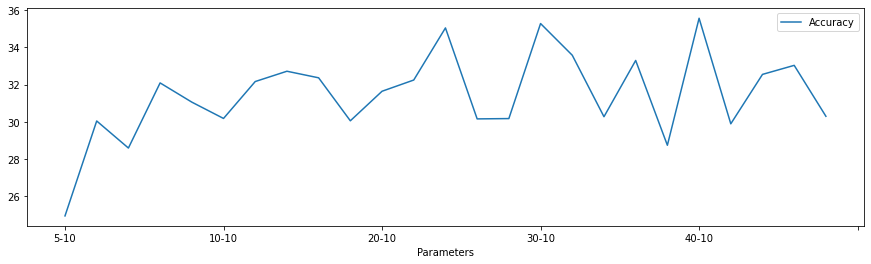

In [24]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [37]:
# Fitting the DNN to the Training set
history = model.fit(trainX_scaled, y_train ,batch_size = 40, epochs = 10, verbose=0)

# Generating Predictions on testing data
Predictions = model.predict(testX_scaled)  # Flatten the predictions


In [38]:
df_testY = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(Predictions)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual   Predicted
0         59   71.459282
1         65   72.005829
2         45   67.147797
3        142  118.135323
4        126  104.625549
...      ...         ...
1014     139  125.304672
1015      45   44.439880
1016      94  141.704117
1017      60   79.958946
1018      36   54.845551

[1019 rows x 2 columns]

In [39]:
APE = 100 * (abs(df_results['Actual'] - df_results['Predicted']) / df_results['Actual'])
df_results['APE'] = APE

# Calculate the accuracy of the ANN model
accuracy = 100 - np.mean(APE)
print('The Accuracy of ANN model is:', accuracy)
df_results.head()

The Accuracy of ANN model is: 81.38748536581295


Actual   Predicted        APE
0      59   71.459282  21.117427
1      65   72.005829  10.778198
2      45   67.147797  49.217326
3     142  118.135323  16.806111
4     126  104.625549  16.963850

In [40]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('r2 score :', r2_score(y_test, Predictions))


Mean Absolute Error: 13.407250566267289
Mean Squared Error: 329.1443930959879
Root Mean Squared Error: 18.142337035122786
Mean Absolute Percentage Error: 0.1861251463418706
r2 score : 0.7957637371268071


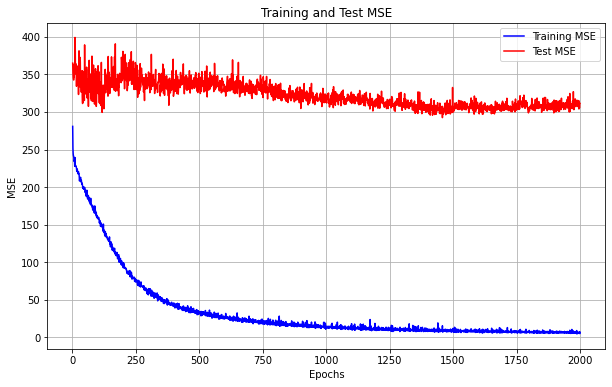

In [41]:
history = model.fit(trainX_scaled, y_train, batch_size=5, epochs=2000, verbose=0, validation_data=(testX_scaled, y_test))

train_mse = history.history['loss']
test_mse = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_mse) + 1)

# Plotting the MSE for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, test_mse, 'r', label='Test MSE')
plt.title('Training and Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

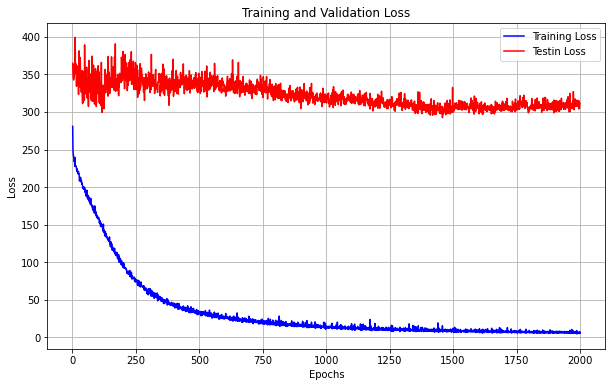

In [42]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the loss for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testin Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

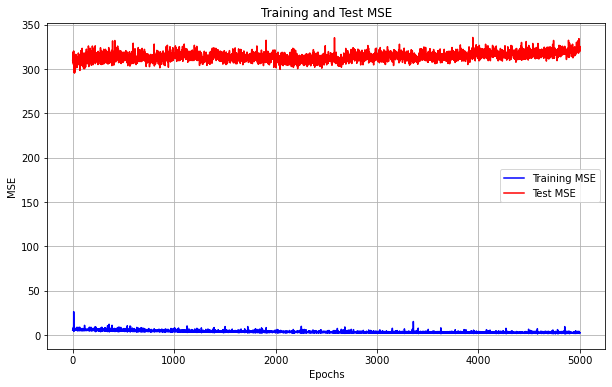

In [43]:
history = model.fit(trainX_scaled, y_train, batch_size=5, epochs=5000, verbose=0, validation_data=(testX_scaled, y_test))

train_mse = history.history['loss']
test_mse = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_mse) + 1)

# Plotting the MSE for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, test_mse, 'r', label='Test MSE')
plt.title('Training and Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

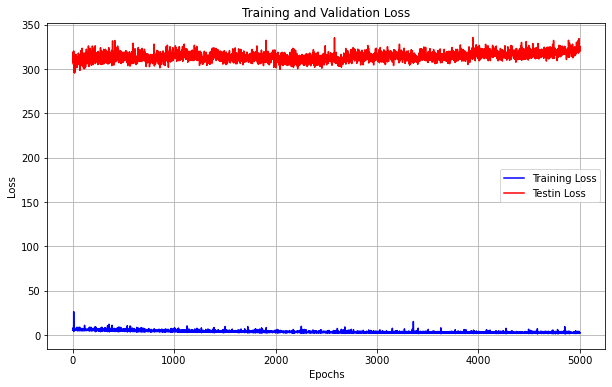

In [44]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the loss for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testin Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()